# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

Let's start with an example problem statement first, and then move on to working with the admission dataset.

Complete all questions directly in the Jupyter notebook for your assignment. The first part is to help re-familairize yourself with the major concepts, and teh second part is what you will be evaluated on in the rubric for how well you can apply those concepts to a real dataset.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Indicator of which free-tier customers will convert to paying customers (yes/no)

#### 2. What are the predictors/covariates? 

Answer: age, gender, location, profession, days since last log in, and whether or not the user is an active user

#### 3. What timeframe is this data relevent for?

Answer: January 2015 - April 2015

#### 4. What is the hypothesis?

Answer: Demographic and customer usage data will allow us to predict if a free-tier customer will convert to a paying customer.

## Let's get started with our dataset

In [83]:
import pandas as pd

df = pd.read_csv('~/genassembly/CHI-DS-3/projects/unit-projects/unit-project-1/assets/admissions.csv')


#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit| indicates whether or not the student was admitted; 0 = not admitted 1 = admitted | binary
gre | score on the GRE | continuous 
gpa | grade point average | continuous
prestige | the rank of an undergraduate's alma mater; 1 is the highest and 4 is the lowest | categorical


We would like to explore the association between admit and gre, gpa, and prestige.


#### 2. What is the outcome of interest?

Answer: Factors that determine whether or not a student will be admitted into graduate school (yes/no).

#### 3. What are the predictors and vairables you want to control for (covariates)? 

Answer: score on the GRE, grade point average, and the rank of an undergraduate's alma mater

#### 4. What timeframe is this data relevent for?

Answer: According to the data source (http://www.ats.ucla.edu/stat/r/dae/logit.htm), the dataset consists of hypothetical data, and therefore would not yield results in a specific timeframe. We would have to obtain real data and reproduce the analysis in order to create a model for use within a specific time frame.

#### 4. What is the hypothesis?

Answer: Using the cross-sectional data from UCLA Institute for Digital Research and Education, we will determine factors that are predictive of admission into UCLA graduate school. Specifically, we will test if higher scores on the GRE, higher grade point average, and higher rank of an undergrauate's school increases the likelihood of admission into UCLA graduate school.

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: Exploratory analysis will allow us to get a feel for the dataset and to find if we have qualitative or quantitative data. First we can view basic information contained in the dataset such as the column index names and the count of records.

In [84]:
list(df.columns.values)

['admit', 'gre', 'gpa', 'prestige']

In [85]:
print len(df.index)

400


We can also look at the sample of the dataset to understand how the data is formatted. Finally, we can look at some basic information relevant to each column index.

In [86]:
df.head(11)

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0
5,1,760.0,3.00,2.0
6,1,560.0,2.98,1.0
7,0,400.0,3.08,2.0
8,1,540.0,3.39,3.0
9,0,700.0,3.92,2.0


#### 2a. How will you examine for and handle the presence of missing data ?

Answer: We have already seen the basic counts of each column, but can specifically find the missing data by counting null values of each variable in the dataframe. It is important not to simply drop rows with null values as you would be sacrificing other important data in the set which could be valuable to the analysis.

If data is missing it is best to replace the data using one of the following methods:  
   Replace the value with the median or mode  
   Replace with the most likely value using linear regression  
   Replace using the nearest neighbor method, which uses the most similar cases to predict what the value would have been


In [92]:
#for admit column 
missing_count_admit = df['admit'].isnull().sum()
print missing_count_admit

0


In [97]:
#find missing values in gre column
missing_count_gre = df['gre'].isnull().sum()
print missing_count_gre

2


In [98]:
#find median of gre
df['gre'].median()

580.0

In [99]:
#replace 2 missing values from gre column
df['gre_fill'] = df['gre'].fillna(580.0)

In [100]:
#find missing values in gpa column
missing_count_gpa = df['gpa'].isnull().sum()
print missing_count_gpa

2


In [101]:
df['gpa'].mode()

0    4.0
dtype: float64

In [102]:
df['gpa'].median()

3.395

In [109]:
#replace 2 missing values for gpa
df['gpa_fill'] = df['gpa'].fillna(3.395)

In [105]:
#find missing values in prestige column
missing_count_prestige = df['prestige'].isnull().sum()
print missing_count_prestige

1


In [106]:
#find the mode
df['prestige'].mode()

0    2.0
dtype: float64

In [107]:
#replace the 1 missing value with the mode
df['prestige_fill'] = df['prestige'].fillna(2.0)

In [119]:
df.head(11)

,admit,gre,gpa,prestige,gpa_fill,gre_fill,prestige_fill
0,0,380.0,3.61,3.0,3.61,380.0,3.0
1,1,660.0,3.67,3.0,3.67,660.0,3.0
2,1,800.0,4.00,1.0,4.00,800.0,1.0
3,1,640.0,3.19,4.0,3.19,640.0,4.0
4,0,520.0,2.93,4.0,2.93,520.0,4.0
5,1,760.0,3.00,2.0,3.00,760.0,2.0
6,1,560.0,2.98,1.0,2.98,560.0,1.0
7,0,400.0,3.08,2.0,3.08,400.0,2.0
8,1,540.0,3.39,3.0,3.39,540.0,3.0
9,0,700.0,3.92,2.0,3.92,700.0,2.0


In [120]:
#test
#use linear regression to replace missing values for gpa

#from sklearn import linear_model, preprocessing
#import numpy as np

#df_complete = df.dropna()
#regr = linear_model.LinearRegression()
#regr.fit(df_complete[["gre_fill","admit"]],df_complete['gre_fill'])

#df.loc[:,'gpa'] = df.apply(lambda x: regr.predict(df[["gre_fill","admit"]])[0] if pd.isnull(x['gpa']) else x['gpa'], axis=1)

In [121]:
#test
#use nearest neighbor of gpa to replace the 2 missing values from gre

#from sklearn.neighbors import KNeighborsRegressor
#from sklearn import linear_model, preprocessing
#import numpy as np

#gre_encoder = preprocessing.LabelEncoder().fit(df['gre'])
#df['gre_coded'] = gre_encoder.transform(df['gre'])


#gpa_encoder = preprocessing.LabelEncoder().fit(df['gpa'])
#df['gpa_coded'] = gpa_encoder.transform(df['gpa'])

#df_complete = df.dropna()

#neigh = KNeighborsRegressor(n_neighbors=2)
#neigh.fit(df_complete[['admit','gre_coded','gpa_coded']], df_complete['prestige'])

#df.loc[:,'prestige'] = df.apply(lambda x: neigh.predict(df[['admit','gre_coded','gpa_coded',]])[0] if pd.isnull(x['prestige']) else x['prestige'], axis=1)

#### 2b. How will determine the distribution of your data? 

Answer: We find the distribution of data by plotting histagrams.

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cd0a110>]], dtype=object)

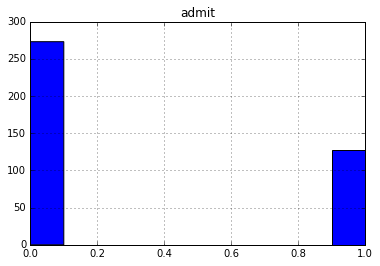

In [123]:
#look at the distribution of admit

df.hist('admit')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ccfe6d0>]], dtype=object)

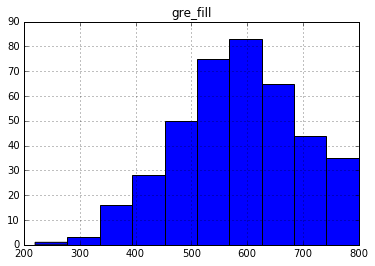

In [124]:
#look at the distribution of gre
df.hist('gre_fill')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d005390>]], dtype=object)

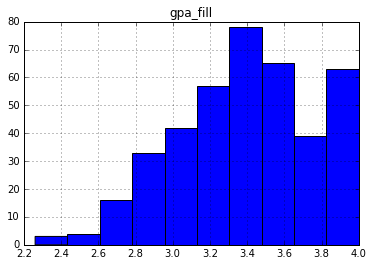

In [125]:
#look at the distribution of gpa

df.hist('gpa_fill')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d2a5690>]], dtype=object)

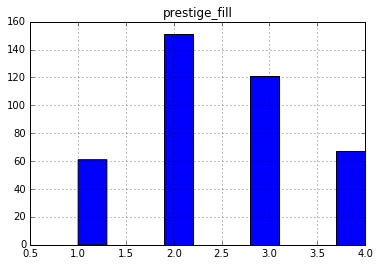

In [126]:
#look at the distribution of prestige

df.hist('prestige_fill')

#### 4b. How will you test for unusually recorded data? 

Answer: To check for unusually recorded data, we will examine the the quantitative checks for irregularities in values entered. This includes examining the minimum and maximum values of each variable. In this particular dataset there are no string variables, so there will be no need for the checks of unusually entered strings, such as fixing leading and trailing spaces, case corrections or common misspellings of words.

In [87]:
#admit column
#count how many values are in the set

df['admit'].count()

400

In [127]:
#admit column
#boolean column; would be useful to know how many 1s and 0s

pd.value_counts(df['admit'].values)

0    273
1    127
dtype: int64

In [129]:
#gre_filled column
#float column; descibe basic statistics on column

df['gre_fill'].describe()

count    400.000000
mean     588.000000
std      115.339751
min      220.000000
25%      520.000000
50%      580.000000
75%      660.000000
max      800.000000
Name: gre_fill, dtype: float64

In [130]:
#
df['gpa_fill'].describe()

count    400.000000
mean       3.390950
std        0.379675
min        2.260000
25%        3.130000
50%        3.395000
75%        3.670000
max        4.000000
Name: gpa_fill, dtype: float64

In [131]:
df['prestige_fill'].describe()

count    400.00000
mean       2.48500
std        0.94446
min        1.00000
25%        2.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: prestige_fill, dtype: float64

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: What factors affect admission into UCLA graduate school? Using cross-sectional data provided by UCLA we will determine if higher scores on the GRE, higher grade point average, and higher rank of an undergrauate's school increases the likelihood of admission into graduate school within the current year.

How data was collected:   
  1. UCLA records of student applicants to UCLA graduate school

What data was collected:   
  1. whether the student was admitted or not   
  2. score on the GRE   
  3. grade point average   
  4. rank of undergraduate school   

Time point and duration of data collection:
  1. Data is collected at one point in time and should be a pull of UCLA records of graduate admission for the previous year.

Hypothesis and direction of expected associations:
  1. Higher score on the GRE will increase the likelihood of admission into UCLA graduate school.
  2. Higher grade point average will increase the likelihood of admissoin into UCLA graduate school.
  3. Attending a higher ranking undergrade school will increase the likelihood of admission into UCLA graduate school.


## Bonus Questions:
1. Write an alternative problem statement for your dataset

Does a higher rank of an undergraduate school affect how high a student's gpa is? Using cross-sectional data provided by UCLA, determine if attending a higher ranking undergraduate school increases a student's gpa.